Utilizaremos el conjunto de datos relacionado con la estimación del precio de una vivienda con base en características
polinomiales sobre las variables predictoras

2. Una vez cargado los datos, ejecuta las líneas de comando. Ten en cuenta que las funciones a aplicar en la fase de preparación de datos dependen de las características de este conjunto (que conociste al realizar la actividad práctica del módulo 1).

3. Construye un modelo de regresión polinomial de grado 2 y deriva los valores de las métricas de rendimiento sobre el conjunto test.

4. Luego, compara los resultados con los obtenidos para regresión lineal y trata de responder las siguientes preguntas: ¿Cuántas nuevas variables fueron generadas con la transformación de grado 2? ¿Hay diferencias en las métricas entre los dos modelos? ¿Cuál generaliza mejor? Si el modelo de regresión polinomial no mejora los resultados ¿Cuál puede ser la razón?

5. Intenta construir un modelo de regresión polinomial de grado 3. Ahora, ¿cuál es el tamaño del conjunto de datos? 

6. Por último, relaciona cada sección del notebook con la metodología ASUM-DM. ¿En cuáles etapas de la metodología se realizan estas actividades?

In [1]:
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

#librerias para relizar aprendizaje automatico 
##para separar el conjunto de datos en entrenamiento y test 
from sklearn.model_selection import train_test_split 

#construir el modelo con el algoritmo de regresion lineal
from sklearn.linear_model import LinearRegression

#para determinar el rendimiento del modelo con las metricas MSE, MAE y R2
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#para realizar la transformacion de variables en la regresion polinomial
from sklearn.preprocessing import PolynomialFeatures

#para sacar un reporte estadistico que podemos usar para determinar la importancia de las variables explicativas 
import statsmodels.api as sm

In [2]:
df = pd.read_csv('C:/Users/XMX5634/Documents/Introduccion Ciencia de Datos Aplicada/Modelos Predictivos/inmuebles.csv',encoding='latin-1')

In [3]:
df.head()

,numero_cuartos,numero_baños,area_de_ construcción_pie2,area_del lote_pie2,numero_pisos,condición,grado,superficie_sótano_pie2,año_de_construcción,precio
0,3,1,1180,5650,1,3,7,0,1955,221900
1,2,1,770,10000,1,3,6,0,1933,180000
2,4,3,1960,5000,1,5,7,910,1965,604000
3,3,2,1680,8080,1,3,8,0,1987,510000
4,3,1,1780,7470,1,3,7,730,1960,229500


In [4]:
df.shape

(5466, 10)

In [5]:
# ver los datos duplicados. 
df = df.drop_duplicates()

In [6]:
df.shape

(5465, 10)

In [7]:
df.dtypes

numero_cuartos                int64
numero_baños                  int64
area_de_ construcción_pie2    int64
area_del lote_pie2            int64
numero_pisos                  int64
condición                     int64
grado                         int64
superficie_sótano_pie2        int64
año_de_construcción           int64
precio                        int64
dtype: object

In [8]:
df.describe()

,numero_cuartos,numero_baños,area_de_ construcción_pie2,area_del lote_pie2,numero_pisos,condición,grado,superficie_sótano_pie2,año_de_construcción,precio
count,5465.000000,5465.000000,5465.000000,5.465000e+03,5465.000000,5465.000000,5465.000000,5465.000000,5465.000000,5.465000e+03
mean,2.929552,1.536505,1498.680878,1.332829e+04,1.174565,3.454895,6.923330,199.177859,1957.160110,3.876787e+05
std,0.955438,0.733901,681.546757,4.500794e+04,0.420787,0.695511,0.910014,359.249020,26.308032,1.790489e+05
min,0.000000,0.000000,290.000000,6.000000e+02,1.000000,1.000000,1.000000,0.000000,1900.000000,7.500000e+04
25%,2.000000,1.000000,1020.000000,5.100000e+03,1.000000,3.000000,6.000000,0.000000,1942.000000,2.510000e+05
50%,3.000000,1.000000,1320.000000,7.352000e+03,1.000000,3.000000,7.000000,0.000000,1955.000000,3.500000e+05
75%,3.000000,2.000000,1780.000000,9.715000e+03,1.000000,4.000000,7.000000,300.000000,1973.000000,4.799000e+05
max,11.000000,6.000000,7120.000000,1.651359e+06,3.000000,5.000000,12.000000,2196.000000,2015.000000,2.000000e+06


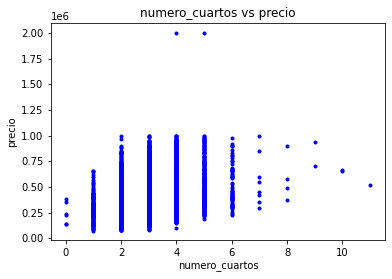

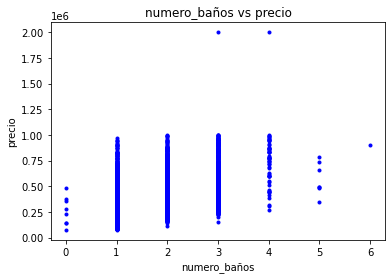

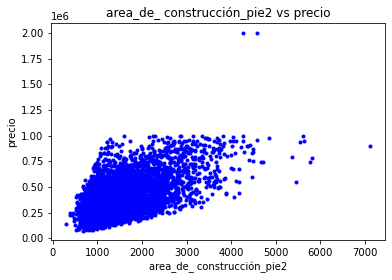

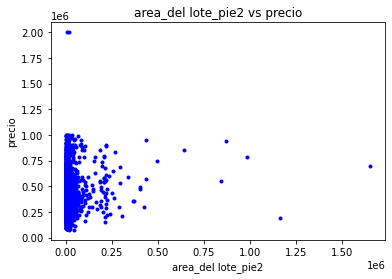

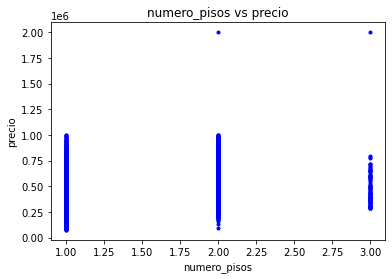

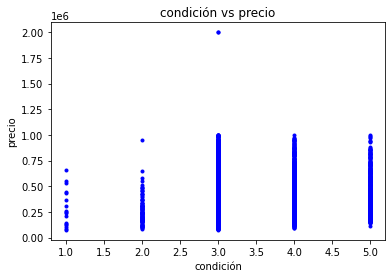

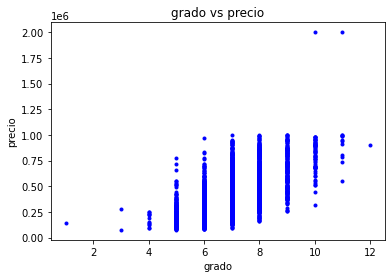

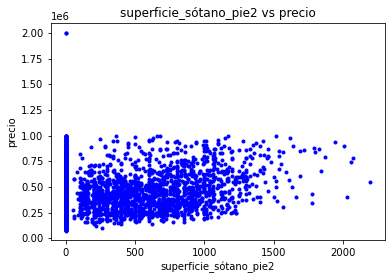

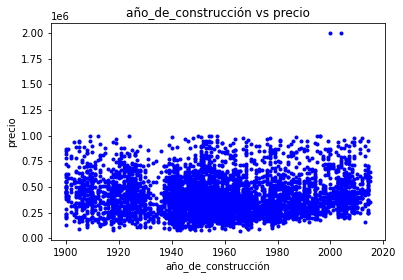

In [9]:
# Generamos una grafica de dispersion utilizando Matplotlib
for col in df.drop(['precio'], axis = 1).columns:
    plt.plot(df[col], df['precio'], '.', color = 'blue')
    plt.title(col + ' vs precio')
    plt.xlabel(col)
    plt.ylabel('precio')
    plt.show()

In [10]:
# Calcular la correlacion de pearson para todos los datos numericos
def pearson_x_grupo(df,variables,grupo, method = 'pearson'):
    #matriz de correlacion
    pearson = df[variables].corr(method)
    dicc = []
    vals = []
    min_ = float(grupo.split(':')[0])
    max_ = float(grupo.split(':')[1])
    
    for index in pearson.index:
        for col in pearson.columns:
            value = pearson.loc[index,col]
            tupl = {index,col}
            if index != col:
                if tupl not in dicc:
                    dicc.append(tupl)
                    if value >= min_ and value <= max_:
                        vals.append([value,list(tupl)])
    
    for index in vals:
        x = index[1][0]
        y = index[1][1]
        print('{} vs {}             {}'.format(x,y,index[0]))
        plt.scatter(df[x],df[y])
        plt.xlabel(x)
        plt.ylabel(y)
        plt.show() 

numero_cuartos vs numero_baños             0.6009790144728379


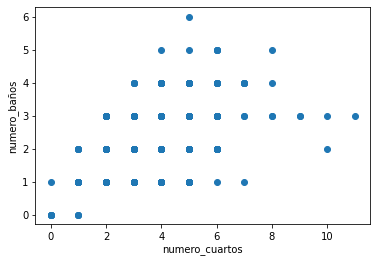

numero_cuartos vs area_de_ construcción_pie2             0.6500892260718284


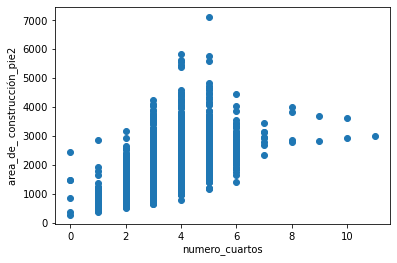

numero_baños vs area_de_ construcción_pie2             0.7614757027271452


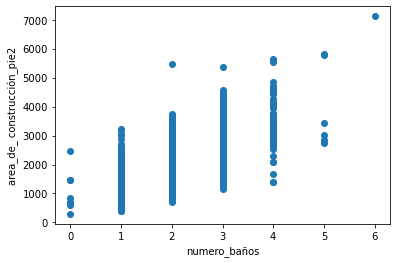

grado vs numero_baños             0.5830877024709957


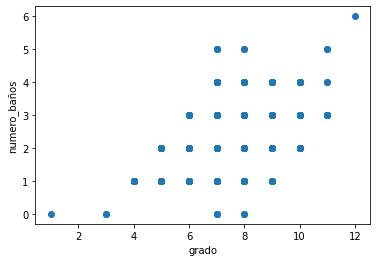

grado vs area_de_ construcción_pie2             0.6702459541605112


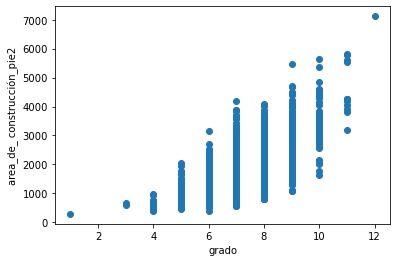

area_de_ construcción_pie2 vs superficie_sótano_pie2             0.5653130317516314


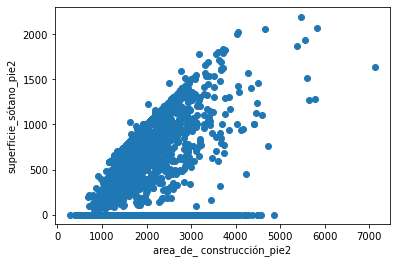

area_de_ construcción_pie2 vs precio             0.5776595953433555


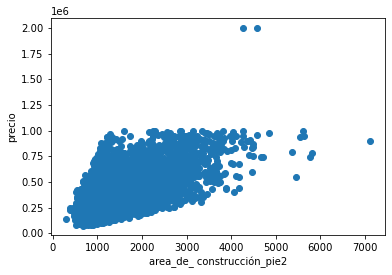

grado vs precio             0.5766531371978321


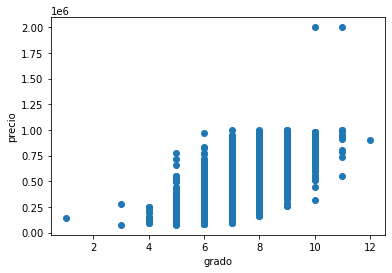

In [11]:
pearson_x_grupo(df,df.columns,'0.5:1.0')

In [12]:
#practica con las variables grado y area de construccion
df1 = df[['grado', 'area_de_ construcción_pie2']]

# Construccion del Modelo

In [13]:
# se selecciona la variable objetivo
Y = df1['area_de_ construcción_pie2']

#del conjunto de datos, se elimina la variable 'precio'
X = df1.drop(['area_de_ construcción_pie2'], axis = 1)

In [14]:
Y

0       1180
1        770
2       1960
3       1680
4       1780
        ... 
5461    2780
5462    2780
5463     710
5464    3990
5465    1490
Name: area_de_ construcción_pie2, Length: 5465, dtype: int64

In [15]:
X

,grado
0,7
1,6
2,7
3,8
4,7
...,...
5461,9
5462,9
5463,7
5464,9


## Separacion en conjunto de entrenamiento y test. 
Entrenamiento: Ajustar un modelo 
Test: hace predicciones

* 1. Train data = Se utiliza para entrenar el modelo con el algoritmo de aprendizaje. 
* 2. Test data = se utiliz apara evaluar el ajuste del modelo

In [16]:
# se realiza la division entrenamiento, test. El 20% de los datos se deja para el test.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y , test_size = 0.2, random_state = 0)

In [17]:
# Antes de construir el modelo debemos de crear un objeto de la clase Linear Regression

#Se crear el objeto para construir el modelo 
modelo_regresion  = LinearRegression()
modelo_regresion

LinearRegression()

A continuacion, se entrena el modelo utilizando el conjunto de entrenamiento 


In [18]:
# Ajustar el modelo con el conjunto de entrenamiento 

modelo_regresion.fit(X_train, Y_train)

LinearRegression()

# Evaluacion del Modelo

Nos van a permitir determinar que tan bien se desempeña un modelo, como se ajusta a los datos, utilziando las siguientes metricas: 
* MSE
* MAE 
* R2

In [19]:
# Se obtienen las predicciones del modelo sobre el conjunto de entrenamiento 
y_pred  = modelo_regresion.predict(X_train)
# se obtienen las metricas a partir de la prediccion y la base de evaluacion (valores reales)
print('MSE: %.2f' % mean_squared_error(Y_train, y_pred, squared = True))
print('RMSE: %.2f' % mean_squared_error(Y_train, y_pred, squared = False))
print('MAE: %.2f' % mean_absolute_error(Y_train, y_pred,))
print('R2: %.2f' % r2_score(Y_train, y_pred))

MSE: 252703.21
RMSE: 502.70
MAE: 382.31
R2: 0.45


In [20]:
# Metricas mas confiables ya que el modelo no conoce estos datos, por ello nos ayudara a verificar que tan buena es su capacidad,
#para generalizar. 
# Se obtienen las predicciones del modelo sobre el conjunto de test
y_pred  = modelo_regresion.predict(X_test)
# se obtienen las metricas a partir de la prediccion y la base de evaluacion (valores reales)
print('MSE: %.2f' % mean_squared_error(Y_test, y_pred, squared = True))
print('RMSE: %.2f' % mean_squared_error(Y_test, y_pred, squared = False))
print('MAE: %.2f' % mean_absolute_error(Y_test, y_pred,))
print('R2: %.2f' % r2_score(Y_test, y_pred))

MSE: 268300.35
RMSE: 517.98
MAE: 393.37
R2: 0.46


Una vez determinado el rendimiento de generalizacion utlizando el conjunto test podemos tomar todos los datos 
y construir el modelo final. 

In [21]:
# Ajustar el modelo con todos los datos 
modelo_regresion.fit(X,Y)

LinearRegression()

In [22]:
# Podemos utilizar los parametros de los modelos (coeficientes de regresion)
modelo_regresion.fit(X,Y)

LinearRegression()

In [23]:
#Para visualizar el intercepto, utiliza el atributo intercept_ del modelo 
modelo_regresion.intercept_

-1976.6562567381945

Vamos a visualizar el modelo utilizando matplotlib

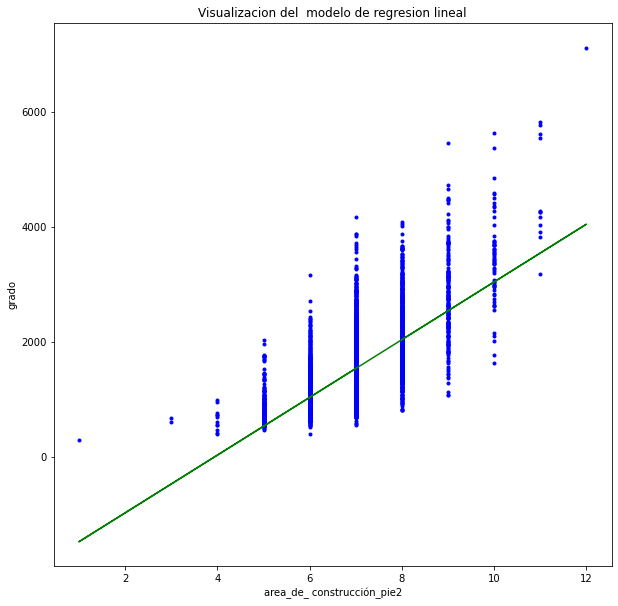

In [24]:
plt.figure(figsize = (10,10))
plt.title('Visualizacion del  modelo de regresion lineal')
plt.xlabel('area_de_ construcción_pie2')
plt.ylabel('grado')
# coeficiente 
w1 = modelo_regresion.coef_[0]
# Intercepto
w0= modelo_regresion.intercept_
plt.plot(X,Y,'.', color = 'blue')
plt.plot(X, w0 + w1*X, color= 'green')
plt.show()

# Interpretacion del modelo

tambien podemos sacar un reporte que nos va a permitir analizar estadisticos del modelo. 

In [25]:
model = sm.OLS(Y, X).fit()

#mostrar los estadisticos del modelo
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                    
===============================================================================================
Dep. Variable:     area_de_ construcción_pie2   R-squared (uncentered):                   0.881
Model:                                    OLS   Adj. R-squared (uncentered):              0.881
Method:                         Least Squares   F-statistic:                          4.051e+04
Date:                        Tue, 14 Mar 2023   Prob (F-statistic):                        0.00
Time:                                18:21:36   Log-Likelihood:                         -42410.
No. Observations:                        5465   AIC:                                  8.482e+04
Df Residuals:                            5464   BIC:                                  8.483e+04
Df Model:                                   1                                                  
Covariance Type:                    nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
grado        221.3162      1.100    201.272      0.000     219.161     223.472
==============================================================================
Omnibus:                     1760.175   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5958.855
Skew:                           1.621   Prob(JB):                         0.00
Kurtosis:                       6.957   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Transformacion polinomial de variables predictoras

primero se crea un objeto de PolynomicalFeatures de sklearn, utilizaremos una transformacion polinomica de grado 2. 

In [111]:
# se indica el grado de la transformacion
pf = PolynomialFeatures(degree = 2)

esta transformacion crea una nueva variable que será igual a grado elevado al cuadrado. 

In [112]:
# se aplica la transformacion a los datos 
X_pol = pf.fit_transform(X)

In [113]:
X_pol

array([[ 1.,  7., 49.],
       [ 1.,  6., 36.],
       [ 1.,  7., 49.],
       ...,
       [ 1.,  7., 49.],
       [ 1.,  9., 81.],
       [ 1.,  8., 64.]])

# Construccion del modelo utilizando regresión polinomial

In [114]:
# se realiza la division entrenamiento, test. El 20% de los datos se deja para el test.

X_train, X_test, Y_train, Y_test = train_test_split(X_pol, Y , test_size = 0.2, random_state = 0)

In [115]:
# Antes de construir el modelo debemos de crear un objeto de la clase Linear Regression

#Se crear el objeto para construir el modelo 
modelo_reg_polinomial  = LinearRegression()
modelo_reg_polinomial

LinearRegression()

A continuacion, se entrena el modelo utilizando el conjunto de entrenamiento 


In [116]:
# Ajustar el modelo con el conjunto de entrenamiento 

modelo_reg_polinomial.fit(X_train, Y_train)

LinearRegression()

# Evaluacion del Modelo

Nos van a permitir determinar que tan bien se desempeña un modelo, como se ajusta a los datos, utilziando las siguientes metricas: 
* MSE
* MAE 
* R2

In [117]:
# Se obtienen las predicciones del modelo sobre el conjunto de entrenamiento 
y_pred  = modelo_reg_polinomial.predict(X_train)
# se obtienen las metricas a partir de la prediccion y la base de evaluacion (valores reales)
print('MSE: %.2f' % mean_squared_error(Y_train, y_pred, squared = True))
print('RMSE: %.2f' % mean_squared_error(Y_train, y_pred, squared = False))
print('MAE: %.2f' % mean_absolute_error(Y_train, y_pred,))
print('R2: %.2f' % r2_score(Y_train, y_pred))

MSE: 237831.24
RMSE: 487.68
MAE: 367.00
R2: 0.48


In [118]:
# Metricas mas confiables ya que el modelo no conoce estos datos, por ello nos ayudara a verificar que tan buena es su capacidad,
#para generalizar. 
# Se obtienen las predicciones del modelo sobre el conjunto de test
y_pred  = modelo_reg_polinomial.predict(X_test)
# se obtienen las metricas a partir de la prediccion y la base de evaluacion (valores reales)
print('MSE: %.2f' % mean_squared_error(Y_test, y_pred, squared = True))
print('RMSE: %.2f' % mean_squared_error(Y_test, y_pred, squared = False))
print('MAE: %.2f' % mean_absolute_error(Y_test, y_pred,))
print('R2: %.2f' % r2_score(Y_test, y_pred))

MSE: 248426.19
RMSE: 498.42
MAE: 376.98
R2: 0.50


In [119]:
print('coeficientes: ', modelo_reg_polinomial.coef_)
print('intercepto: ', modelo_reg_polinomial.intercept_)

coeficientes:  [   0.         -559.00222715   73.66135487]
intercepto:  1772.7020904434094


Vamos a visualizar el modelo utilizando matplotlib

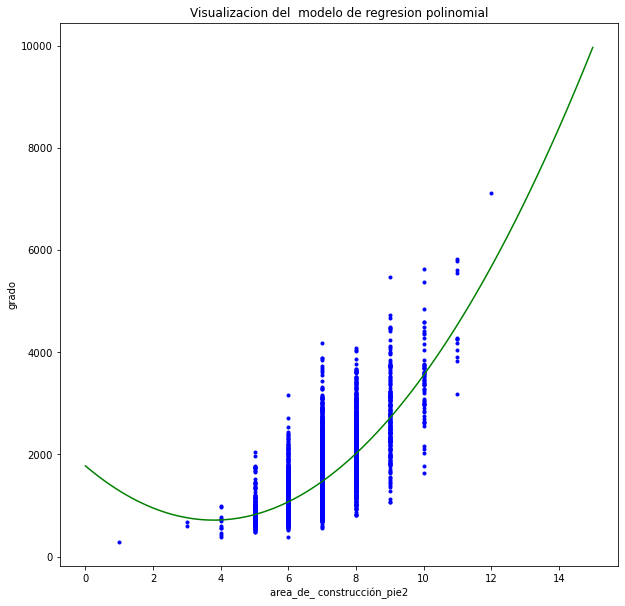

In [121]:
plt.figure(figsize = (10,10))
plt.title('Visualizacion del  modelo de regresion polinomial')
plt.xlabel('area_de_ construcción_pie2')
plt.ylabel('grado')
# coeficiente 1
w1 = modelo_reg_polinomial.coef_[1]

#coeficiente 2
w2 = modelo_reg_polinomial.coef_[2]

# Intercepto
w0= modelo_reg_polinomial.intercept_

plt.plot(X,Y,'.', color = 'blue')

puntos = np.linspace(0,15,100)
modelo =  w0 + w1*puntos + w2*(puntos**2)
plt.plot(puntos,modelo, color= 'green')


plt.show()

 Este modelo logra ser un mejor acercamiento para eplicar la relación entre las dos variables. 

# Evaluacion del modelo de regresion polinomial